In [1]:
using DelimitedFiles
using Plots

In [2]:
function analytical_psi(t, x)
    return sin(2 * pi * (x - t))
end

analytical_psi (generic function with 1 method)

In [3]:
parent_dir =  "/Users/liwei/docker-workspace/simulations/"

"/Users/liwei/docker-workspace/simulations/"

#### Functions

In [4]:
function plot_conv(parent_dir, dirs, nxs, nbuf; lev = 1, tmax = 1.0, cord = 4)
    nxas = nxs .+ 2*nbuf
    plt = plot()
    for i in 1:length(dirs)
        fulldir = parent_dir * dirs[i]
        tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
        for fname in tsv_files
            data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
            if abs(data[1, 2] - tmax) < 1e-12
                x = data[findall(x -> x == lev, data[:, 3]), 5][1+nbuf:nxas[i]-nbuf]
                psi = data[findall(x -> x == lev, data[:, 3]), 6][1+nbuf:nxas[i]-nbuf]
                error = (psi - analytical_psi.(tmax, x))
                plt = plot!(x, error * (2^cord)^(i-1))
            end
        end
    end
    display(plt)
end

plot_conv (generic function with 1 method)

## Uniform Grid (4-th order convergent)

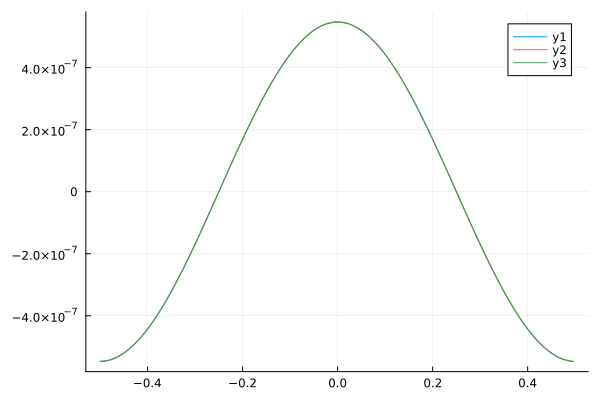

In [5]:
dirs = [
    "scalarwave_1levels_nx100",
    "scalarwave_1levels_nx200",
    "scalarwave_1levels_nx400"
]
nxs = [100, 200, 400]
nbuf = 2
plot_conv(parent_dir, dirs, nxs, nbuf; lev = 1, cord = 4)

## 2 Levels without Subcycling

### level 1 (3-th order covergent)

In [6]:
dirs = [
    "scalarwave_2levels_nx100_noSC",
    "scalarwave_2levels_nx200_noSC",
    "scalarwave_2levels_nx400_noSC"
]
nxs = [100, 200, 400]
nbuf = 12

12

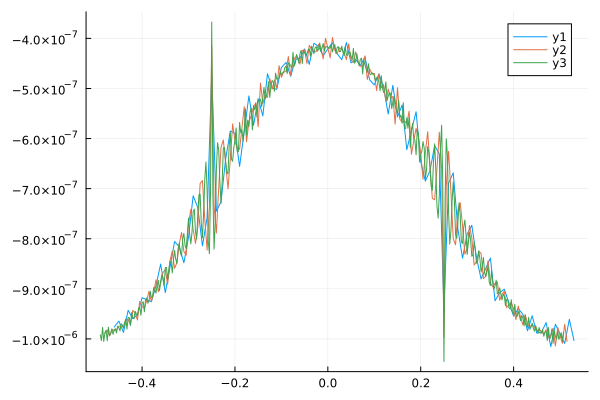

In [7]:
plot_conv(parent_dir, dirs, nxs, nbuf; lev = 1, cord = 4)

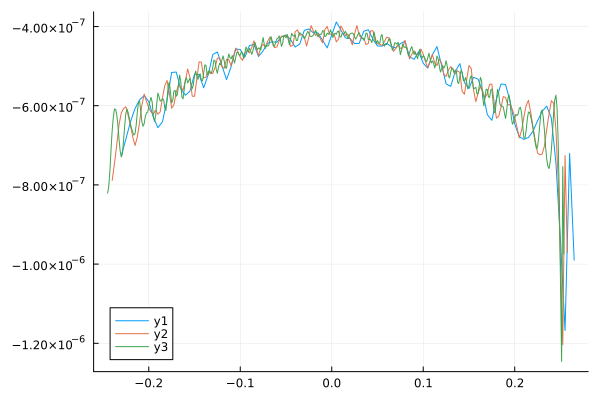

In [8]:
plot_conv(parent_dir, dirs, nxs, nbuf; lev = 2, cord = 4)

## 2 Levels with Subcycling

In [9]:
dirs = [
    "scalarwave_2levels_nx100",
    "scalarwave_2levels_nx200",
    "scalarwave_2levels_nx400"
]
nxs = [100, 200, 400]
nxas = nxs .+ 24

3-element Vector{Int64}:
 124
 224
 424

### level 1 (3-th order covergent)

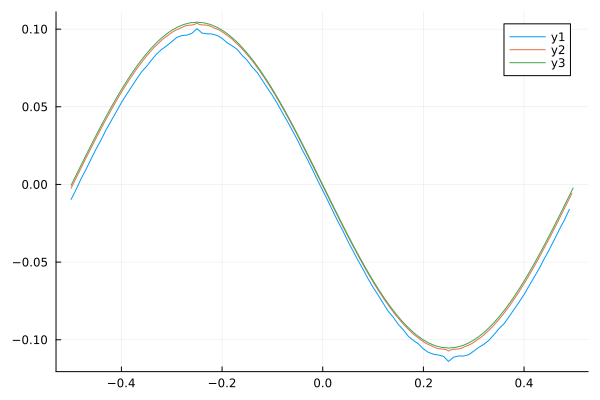

In [10]:
dxs = [0.01, 0.005, 0.0025]
lev = 1
tmax = 1.0
cord = 2
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            x = data[findall(x -> x == lev, data[:, 3]), 5][1+12:nxas[i]-12]
            psi = data[findall(x -> x == lev, data[:, 3]), 6][1+12:nxas[i]-12]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-cord)
            plt = plot!(x, error)
        end
    end
end
display(plt)

### level 2 (3-th order covergent)

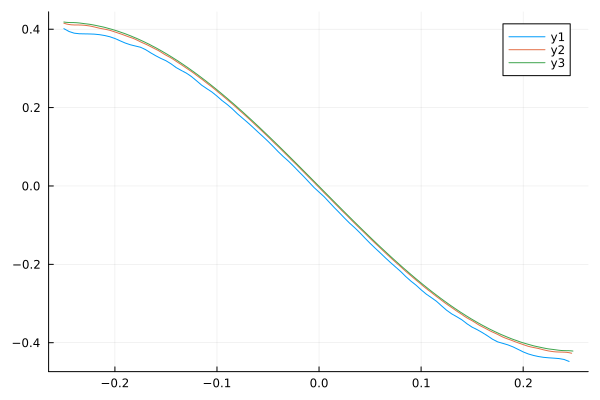

In [11]:
dxs = [0.005, 0.0025, 0.00125]
lev = 2
tmax = 1.0
cord = 2.0
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            x = data[findall(x -> x == lev, data[:, 3]), 5][1+12:nxas[i]-12]
            psi = data[findall(x -> x == lev, data[:, 3]), 6][1+12:nxas[i]-12]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-cord)
            plt = plot!(x, error)
        end
    end
end
display(plt)